<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_1_1_Perceptron_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron « from scratch »

Dans cet exercice nous allons recoder un neurone ou perceptron. Cela vous permettra de voir plus précisément comment les réseaux de neurones fonctionnent.

1. Importez `pandas`, `numpy` et `matplotlib.pyplot` :

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Un perceptron est composé d'une somme pondérée des entrées plus un biais qui sont ensuite passés dans une fonction non-linéaire ou fonction d'activation.

### Fonction d'activation

Nous sommes dans le cas d'une classification binaire. Nous allons donc utiliser la **sigmoïde** dont la formule est la suivante :

$$
\sigma(x)=\frac{1}{1 + e^{- x}}
$$

2. À partir de la formule ci-dessus complétez la fonction suivante :

In [0]:
def sigmoid(x):
    ### A VOUS ###
    return 1 / (1 + np.exp(-x))
    ##############

3. Nous allons avoir besoin de la dérivée de la sigmoïde dont voici la formule :

$$
\frac{d\sigma (x)}{d(x)} = \sigma (x)\cdot (1-\sigma(x))
$$

In [0]:
def d_sigmoid(x):
    ### A VOUS ###
    return sigmoid(x) * (1 - sigmoid(x))
    ##############

4. Visualisons cette fonction. Pour faire cela, créez une variable `val_x` contenant des valeurs allant de `-10` à `10` avec un pas de `0.1` (regardez du côté de `np.arange` par exemple). Calculez les valeurs correspondantes avec votre fonction sigmoïde ainsi que pour sa dérivée. Affichez le tout !

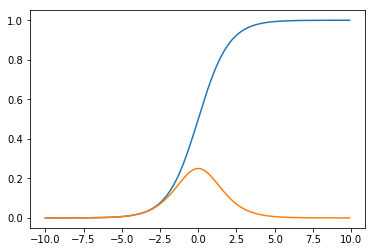

In [0]:
val_x = np.arange(-10, 10, 0.1)
val_y = [sigmoid(x) for x in val_x]
val_y_d = [d_sigmoid(x) for x in val_x]
plt.plot(val_x, val_y)
plt.plot(val_x, val_y_d)
plt.show()

### Forward propagation

Cette phase correspond à la phase de prédiction du neurone. Nous allons traverser le neurone pour calculer sa sortie.

La formule générale est donnée par :

$$
Z = W * X + b
\\
A = g(Z)
$$

$Z$ représente donc la somme pondérée des entrées du neurone et $A$ la sortie du neurone (c'est à dire après être passé par la fonction d'activation).

5. Implémentez la fonction `forward_propagation` à partir de la formule ci-dessus :

In [0]:
def forward_propagation(inputs, weights, bias):
    ### A VOUS ###
    z = np.dot(inputs, weights) + bias
    a = sigmoid(z)
    return a
    ##############

In [0]:
np.dot?

### Backward propagation

Une fois que le neurone a fait une prédiction, nous allons regarder l'erreur qu'il a effectué et rectifier les paramètres en conséquence.

Cela se déroule en deux phase :

- calcule des dérivées partielles,
- mise à jour des paramètres.

Nous allons utiliser la fonction de coût MSE, dont voici la formule :

$$
MSE = \frac{\mathrm{1} }{\mathrm{n}} \sum\nolimits_{i=1}^{n} (predicted - observed)^{2}
$$

6. Implémentez la fonction de coût suivante :

In [0]:
def cost(predicted, observed):
    ### A VOUS ###
    return np.mean((np.square(predicted - observed))
    ##############

Nous allons ensuite prendre la dérivée partielle du coût en fonction des paramètres. Grâce à la « _chain rule_ », nous allons pouvoir dériver cela de la manière suivante :

$$
\frac {\partial cost}{\partial w} = \frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z} \times \frac {\partial z}{\partial w}
$$

où :

$$
\frac {\partial cost}{\partial pred} = (predicted - observed)
\\
\frac {\partial pred}{\partial z} = \frac{d\sigma (x)}{d(x)}
$$

7. À partir des étapes ci-dessus, implémentez la fonction suivante :

In [0]:
def backward_propagation(predictions, observed):
    ### A VOUS ###
    dcost_dpred = predictions - observed
    dpred_dz = (predictions)*(1-predictions)
    ##############
    return dcost_dpred * dpred_dz

Ensuite, nous mettons à jour les poids simultanément de la manière suivante :

$$
weights =: weights - \gamma (\frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z} \times \frac {\partial z}{\partial w})
\\
bias =: bias - \gamma (\frac {\partial cost}{\partial pred} \times \frac {\partial pred}{\partial z})
$$

8. Complétez la fonction pour mettre à jour les poids :

In [0]:
def update_parameters(weights, bias, update, inputs, lr=1):
    ### A VOUS ###
    weights -= lr * 1/len(update)*np.dot(inputs.T, update)
    bias -= lr * np.mean(update, axis=0)
    ##############
    return weights, bias

### Entraînement

Nous avons maintenant tout ce qu'il faut pour entrainer notre perceptron. Il faut que nous initialisions les paramètres et le biais.

9. Complétez la fonction suivante en utilisant `np.random.rand` afin d'initialiser les paramètres et le biais :

In [0]:
def init_weights(input_shape):
    ### A VOUS ###
    weights = np.random.rand(input_shape, 1) * 0.01
    bias = np.random.rand(1)
    ##############
    return weights, bias

Ça y est ! Nous y sommes. Nous allons implémenter la fonction d'entraînement de notre perceptron. Souvenez-vous de l'ordre des opérations :

1. forward propagation
2. backward propagation
3. mise à jour des paramètres

Et cela durant un nombre déterminé d'itérations jusqu'à convergence.

10. Implémentez la fonction `training` ci-dessous :

In [0]:
def training(inputs, labels, epochs=100):
    cost_hist = list()
    weights, bias = init_weights(inputs.shape[1])
    for i in range(epochs):
        predictions = forward_propagation(inputs, weights, bias)
        cost_hist.append(cost(predictions, labels))
        update = backward_propagation(predictions, labels)
        weights, bias = update_parameters(weights, bias, update, inputs)
        print("Epoch {}/{}: loss - {}".format(i + 1, epochs, cost_hist[i]))
    return cost_hist

Nous allons entraîner notre perceptron sur un petit dataset issu du [MNIST](http://yann.lecun.com/exdb/mnist/). C'est un dataset historique qui contient des images de chiffres écrites à la main. Chacune des images est en noir et blanc et de dimension (28, 28).

11. Chargez le fichier `src/train.csv` :

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.6%20--%20Deep%20Learning%20-%20Les%20diff%C3%A9rents%20R%C3%A9seaux%20de%20Neurones%20%26%20FASTAI/S6-2%20--%20Introduction%20aux%20r%C3%A9seaux%20de%20neurones/Exercices/src/train.csv?token=AFB53D6FCFUOLTFCO6QPJSC5VV7T4')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


12. Séparez la colonne `label` dans une variable `Y` et le reste dans une variable `X` :

In [0]:
Y = df['label'].values.reshape((8816, 1))
X = df.drop(['label'], axis=1).values
Y.shape, X.shape

((8816, 1), (8816, 784))

13. Profitez-en pour regarder à quoi ressemble ces images :

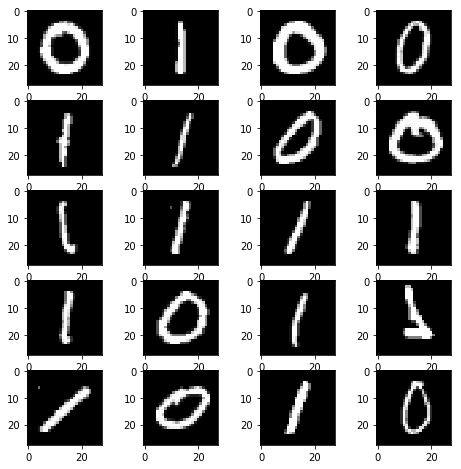

In [0]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5

for i in range(1, columns * rows +1):
    X1 = X[i].reshape(28, 28)
    fig.add_subplot(rows, columns, i)
    plt.imshow(X1, cmap='gray')
plt.show()

14. Utilisez `training` pour entraîner votre perceptron !

In [0]:
X = X / 255.0
hist = training(X, Y, epochs=20)

Epoch 1/20: loss - 2680.676709460146
Epoch 2/20: loss - 715.3205980929592
Epoch 3/20: loss - 222.71829264953223
Epoch 4/20: loss - 182.12629073358787
Epoch 5/20: loss - 156.45993774721506
Epoch 6/20: loss - 138.12084217776075
Epoch 7/20: loss - 124.2670588930096
Epoch 8/20: loss - 113.38743679458717
Epoch 9/20: loss - 104.59035823362105
Epoch 10/20: loss - 97.31275971308405
Epoch 11/20: loss - 91.18037222403898
Epoch 12/20: loss - 85.9341167959246
Epoch 13/20: loss - 81.38862168155823
Epoch 14/20: loss - 77.40755180602054
Epoch 15/20: loss - 73.888275064472
Epoch 16/20: loss - 70.75197271362633
Epoch 17/20: loss - 67.93705674381458
Epoch 18/20: loss - 65.39466757688677
Epoch 19/20: loss - 63.085520669141374
Epoch 20/20: loss - 60.97765123356113


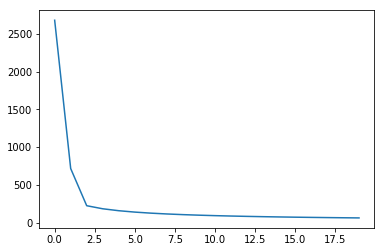

In [0]:
plt.plot(hist)
plt.show()

Félicitations ! Vous avez codé votre premier neurone !

Bien entendu il est très perfectible. Nous vous invitons à revenir dessus tant que vous voulez et à l'améliorer. Par exemple en :

- utilisant des classes Python
- ajoutant des couches de neurones
- créant d'autres fonctions d'activation
- ...